In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('all_items_improved.csv', sep=',')

#### Potential bugs found :
- numbers in the menu item text (meat weight for instance, nb of snails 6/12 + price in the text)
- prices negative (special offers for lunch menus, ..)
- zip codes missing
- comma forgotten in the price (2700 instead of 27,00)

#### Observations : 
- tags only in the first row of each restaurants
- rest_avg_price often overpriced (close to worst case scenario)

## Improving/Debugging the data

### Supressing negative price (special offers on the menu, ex : -1e for lunch)

In [14]:
data = data[data.item_price > 0]

### 'location' feature, switching to zip codes

In [5]:
data['rest_location'] = data['rest_location'].apply(lambda x: x.split("\n")[1].strip())
data['rest_location'] = data['rest_location'].replace('', '0').replace('Bercy Village', '0').astype(int)

In [7]:
data['rest_location'].unique()

array([    0, 75002, 75018, 75015, 75006, 75010, 75017, 75014, 75008,
       75012, 75003, 75011, 75005, 75001, 75007, 75020, 75019, 75004,
       75116, 75013, 75009, 75016])

### Dropping item_prices with prices over 200e 
##### (noise + errors in the comma location most of the times), will only affect a little our predictions for wine and champagne

In [65]:
data = data[data.item_price < 200]

## Descriptive Statistics

### Dataset Size

In [66]:
print('Number of restaurants : ' + str(len(data.rest_name.unique())))
print('Number of menu items : ' + str(len(data.rest_name)))

Number of restaurants : 4599
Number of menu items : 80379


### Menu items prices Distribution

In [86]:
data.item_price.describe()[1:].round(1)

mean     13.9
std      13.9
min       0.6
25%       6.0
50%      10.0
75%      16.5
max     199.0
Name: item_price, dtype: float64

Proportion of items < 10e : 49.42%
Proportion of items > 100e : 0.24%


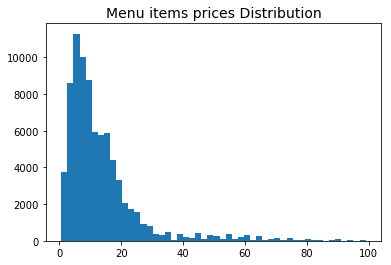

In [54]:
nb_items = float(len(data.item_price))
print('Proportion of items < 10e : ' + str(round(100*len(data[data.item_price < 10].rest_name)/nb_items,2)) +'%')
print('Proportion of items > 100e : ' + str(round(100*len(data[data.item_price > 100].rest_name)/nb_items,2))+'%')

a=plt.hist(data[data.item_price < 100].item_price, bins=50)
plt.title('Menu items prices Distribution', fontsize = 14)

### The Fork average prices / ratings

In [85]:
data.loc[data.rest_name.drop_duplicates().index][['rest_avg_price', 'rest_global_rating']].describe().round(1)[1:]

,rest_avg_price,rest_global_rating
mean,29.6,8.4
std,18.3,1.0
min,9.0,2.0
25%,20.0,8.1
50%,25.0,8.6
75%,34.0,9.0
max,330.0,10.0


### Price disparities between locations

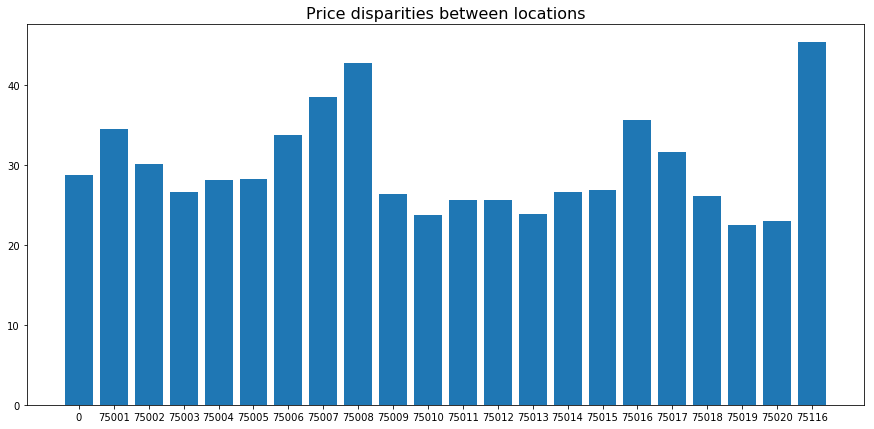

In [168]:
df = data.groupby(data.rest_name).first()
price_location = df.groupby(df.rest_location).mean().rest_avg_price

x_axis = range(len(price_location))
big_fig = plt.figure(1,figsize=(15,7))
fig = plt.subplot(111)
fig.bar(x_axis, price_location.values)
fig.set_xticks(x_axis)
fig.set_xticklabels(price_location.index)
fig.set_title('Price disparities between locations', fontsize=16)

### Price standard deviation per restaurant

In [99]:
print('Std of the prices inside a restaurant : ' 
      + str(round(data.groupby(data.rest_name).std().item_price.mean(), 1)) + ' euros')

Std of the prices inside a restaurant : 11.3 euros


### Statistics on the nb of words in the items' texts

In [138]:
data['item_length'] = data['item'].apply(lambda x: len(x.split()))
data['item_length'].describe()[1:]

mean     5.241991
std      4.034759
min      1.000000
25%      3.000000
50%      4.000000
75%      7.000000
max     46.000000
Name: item_length, dtype: float64

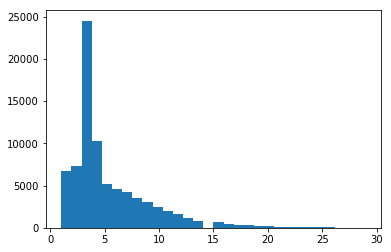

In [149]:
a = plt.hist(data[data.item_length<30].item_length, bins = 30)